# Explorativn√≠ anal√Ωza a statistika jedn√© promƒõnn√©

V t√©to lekci se pod√≠v√°me na z√°kladn√≠ n√°stroje a postupy, kter√© se hod√≠ pro anal√Ωzu jedn√© promƒõnn√©. Nebudeme se tedy zab√Ωvat vztahy a souvislostmi mezi v√≠ce promƒõnn√Ωmi - to bude p≈ôedmƒõtem mnoh√Ωch dal≈°√≠ch lekc√≠. Na pomoc si pro tento √∫ƒçel vezmeme p≈ôedev≈°√≠m ƒçasov√© ≈ôady s √∫daji o poƒças√≠ (teplota, tlak apod.). V pr√°ci n√°m bude v√Ωznamƒõ pom√°hat vizualizace.

Abychom s daty mohli efektivnƒõ pracovat, budeme muset data je≈°tƒõ proƒçistit. To je (bohu≈æel) bƒõ≈ænou souƒç√°st√≠ datov√© anal√Ωzy, proto≈æe zdrojov√° data ƒçasto obsahuj√≠ chyby. P≈ôi pr√°ci s ƒçasov√Ωmi ≈ôadami vyu≈æijeme bohat√© mo≈ænosti `pandas` pro pr√°ci s ƒçasov√Ωmi √∫daji.

Pod√≠v√°me se na z√°klady statistiky. Dozv√≠me se, jak pracovat s pojmy st≈ôedn√≠ hodnota, standardn√≠ odchylka, medi√°n, kvantil ƒçi kvartil. Nauƒç√≠me se pracovat s histogramy, s boxploty a s distribuƒçn√≠ funkc√≠.

V t√©to lekci se nauƒç√≠≈°:
* naƒç√≠tat data ze soubor≈Ø ve form√°tu Excel,
* efektivnƒõ ƒçistit data,
* z√°kladn√≠ statistiky jedn√© promƒõnn√©, vƒçetnƒõ rozdƒõlovac√≠ funkce,
* vizualizovat ƒçasov√© ≈ôady a jejich statistick√© vlastnosti.

## Naƒçten√≠ knihoven

Budeme pou≈æ√≠vat samoz≈ôejmƒõ `pandas`, pro vizualizaci pak [`matplotlib`](https://matplotlib.org/) a [`seaborn`](https://seaborn.pydata.org/).

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## P≈ô√≠prava dat

### Naƒçten√≠ dat o poƒças√≠

Na≈°√≠ z√°kladn√≠ datovou sadou budou data o poƒças√≠ v ƒåesk√© Republice. Data na sv√Ωch str√°nk√°ch poskytuje hydrometeorologick√Ω √∫stav (ƒåHM√ö): https://www.chmi.cz/historicka-data/pocasi/denni-data. 

Mo≈æn√° p≈ôekvapivƒõ nen√≠ √∫plnƒõ snadn√© dobr√° a podrobn√° data z√≠skat. Na≈°tƒõst√≠ ale existuje slu≈æba [meteostat](https://meteostat.net/en/) a stejnojmenn√° knihovna pro Python, kterou jsme pou≈æili pro sta≈æen√≠ dat pro nƒõkolik ƒçesk√Ωch stanic. Notebook [weather_data.ipynb](weather_data.ipynb) obsahuje k√≥d pro to pou≈æit√Ω, ale nebudeme se j√≠m zde zab√Ωvat.

Samotn√© naƒçten√≠ souboru je pomƒõrnƒõ snadn√©. Pou≈æijeme na to t≈ô√≠du `ExcelFile`, proto≈æe kromƒõ naƒç√≠t√°n√≠ poskytuje tak√© property `sheet_names`.

ƒåasto staƒç√≠ (a je jednodu≈°≈°√≠) pou≈æ√≠t funkci [`read_excel`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html#pandas.read_excel). V dokumentaci si v≈°imni velk√©ho mno≈æstv√≠ argument≈Ø, kter√© umo≈æ≈àuj√≠ spr√°vnƒõ naƒç√≠st v≈°elijak form√°tovan√© soubory a hodnoty v nich. 

In [12]:
DATA_FILENAME = "data-daily.xlsx"

# otev≈ôen√≠ Excel souboru
denni_excel = pd.ExcelFile(DATA_FILENAME)
denni_excel

Zobraz√≠me si seznam list≈Ø v souboru.

In [13]:
denni_excel.sheet_names

['Praha-Ruzyne', 'Plzen-Line', 'Karlovy Vary', 'Brno-Turany', 'Holesov']

Zat√≠m jsme ≈æ√°dn√° data nenaƒçetli (nem√°me ≈æ√°dn√Ω `DataFrame` s daty ze souboru). Data naƒçte ve formƒõ `DataFrame` a≈æ metoda [`parse`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.ExcelFile.parse.html#pandas.ExcelFile.parse).

In [21]:
# naƒçti data z jednoho listu a zobraz n√°hodn√Ωch 5
denni_ruzyne = denni_excel.parse("Praha-Ruzyne")
denni_ruzyne.sample(5)

time  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
7727  1981-11-19   7.8   4.0  11.0   3.0   NaN   NaN  20.4   NaN     NaN   NaN
15265 2003-09-21  20.7  11.8  30.6   0.0   NaN   NaN  10.2   NaN  1020.4   NaN
855   1943-09-09  15.1   7.8  21.1   NaN   NaN   NaN   NaN   NaN     NaN   NaN
3256  1960-05-05  12.4   2.8  18.9   NaN   NaN   NaN   NaN   NaN     NaN   NaN
13982 2000-03-14   5.8   1.5   8.2   0.5   NaN   NaN  25.8   NaN  1017.8   NaN

Vid√≠me, ≈æe mnoho sloupc≈Ø obsahuje "NaN", neboli "not a number" - to m≈Ø≈æe znamenat ledacos.

‚ö†Ô∏è Pozn√°mka: NaN je p≈Øvodnƒõ numerickou reprezentac√≠ **neplatn√© matematick√© operace** (jako nap≈ô. 0 / 0), nicm√©nƒõ v pandas se tento v√Ωznam smƒõ≈°uje s **chybƒõj√≠c√≠ hodnotou** (missign value, N/A). Je to podobn√©, ale ne tot√©≈æ. Naopak nƒõkter√© jin√© knihovny (nap≈ô. polars) mezi obƒõma v√Ωznamy rigor√≥znƒõ rozli≈°uj√≠, co≈æ m≈Ø≈æe b√Ωt zdrojem nepƒõkn√Ωch chyb, kdy≈æ mezi knihovnami ƒçlovƒõk p≈ôech√°z√≠.

In [22]:
denni_ruzyne.dtypes

time    datetime64[ns]
tavg           float64
tmin           float64
tmax           float64
prcp           float64
snow           float64
wdir           float64
wspd           float64
wpgt           float64
pres           float64
tsun           float64
dtype: object

Pro vysvƒõtelnou dodejme, co kter√Ω sloupec znamen√° (viz https://dev.meteostat.net/formats.html#meteorological-parameters):
- `time`: ƒças (nebo sp√≠≈° datum) mƒõ≈ôen√≠
- `tavg`: pr≈Ømƒõrn√° denn√≠ teplota (¬∞C)
- `tmin`: nejni≈æ≈°√≠ denn√≠ teplota (¬∞C)
- `tmax`: nejvy≈°≈°√≠ denn√≠ teplota (¬∞C)
- `prcp`: celkov√Ω √∫hrn sr√°≈æek (mm)
- `snow`: v√Ω≈°ka snƒõhov√© pokr√Ωvky (mm)
- `wdir`: smƒõr vƒõtru (¬∞)
- `wspd`: rychlost vƒõtru (km/h)
- `wpgt`: max. rychlost vƒõtru v poryvech (km/h)
- `pres`: tlak  (hPa)
- `tsun`: doba sluneƒçn√≠ho svitu (min)

### ƒåasov√Ω index

Proto≈æe se budeme zab√Ωvat ƒçasov√Ωmi ≈ôadami, je zcela p≈ôirozen√©, ≈æe ze sloupce "time" udƒõl√°me index:

In [23]:
denni_ruzyne = denni_ruzyne.set_index("time")
denni_ruzyne

tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres   tsun
time                                                                     
1940-01-02  -9.4   NaN  -7.2   NaN   NaN   NaN   NaN   NaN     NaN    NaN
1940-01-03  -9.9 -13.9  -6.1   NaN   NaN   NaN   NaN   NaN     NaN    NaN
1940-01-06  -7.0  -7.8  -6.1   NaN   NaN   NaN   NaN   NaN     NaN    NaN
1940-01-07  -9.2 -11.1  -7.2   NaN   NaN   NaN   NaN   NaN     NaN    NaN
1940-01-12 -15.9 -22.8 -11.1   NaN   NaN   NaN   NaN   NaN     NaN    NaN
...          ...   ...   ...   ...   ...   ...   ...   ...     ...    ...
2025-08-27  18.8  12.6  27.0   0.3   NaN   NaN   9.7  24.1  1012.1  429.0
2025-08-28  21.2  15.7  30.0   7.0   NaN   NaN  12.0  47.0  1006.3  374.0
2025-08-29  18.6  15.3  23.7  17.7   NaN   NaN  10.4  27.8  1004.4  231.0
2025-08-30  18.1  15.2  23.0  13.1   NaN   NaN  12.2  33.3  1008.3  292.0
2025-08-31  18.0  11.6  23.9   0.0   NaN   NaN   9.1  37.0  1013.2  357.0

[23277 rows x 10 columns]

### ƒåi≈°tƒõn√≠ dat

Co se stalo s nedefinovan√Ωmi hodnotami? Z≈Østaly tam. Pojƒème se pod√≠vat, jak to vlastnƒõ zjistit a co se s t√≠m d√° dƒõlat.

Obecnƒõ m√°me t≈ôi z√°kladn√≠ mo≈ænosti.

1. Nedƒõlat nic, tj. nechat chybƒõj√≠c√≠ data chybƒõt. To je mo≈æn√° p≈ôekvapivƒõ ƒçasto dobr√° volba, proto≈æe mnoho funkc√≠ si s chybƒõj√≠c√≠mi daty porad√≠ spr√°vnƒõ. To je rozd√≠l oproti `numpy`, kde funkce typicky `NaN`y nemaj√≠ r√°dy. ƒåasto existuj√≠ varianty funkc√≠ (nap≈ô. `numpy.mean` -> `numpy.nanmean`), kter√© `NaN`y berou jako chybƒõj√≠c√≠ data. 

2. Pozorov√°n√≠ (tj. ≈ô√°dky, proto≈æe m√°me tidy data) s chybƒõj√≠c√≠mi z√°znamy vynechat. K tomu slou≈æ√≠ metoda [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna).

3. Chybƒõj√≠c√≠ data nahradit nƒõjakou vhodnou hodnotou. Co jsou vhodn√© hodnoty, z√°le≈æ√≠ na povaze dat a na tom, co s daty d√°le dƒõl√°me. Nƒõkdy je vhodn√© nahradit chybƒõj√≠c√≠ hodnoty nƒõjakou "typickou" hodnotou, t≈ôeba pr≈Ømƒõrem. Pro ƒçasov√© ≈ôady je vƒõt≈°inou logiƒçtƒõj≈°√≠ nahradit hodnotou z okol√≠ (p≈ôedchoz√≠ nebo n√°sleduj√≠c√≠). O nahrazov√°n√≠ typick√Ωmi hodnotami (angl. imputation) se doƒçte≈° https://scikit-learn.org/stable/modules/impute.html a mo≈æn√° dozv√≠≈° v√≠c i pozdƒõji. K nahrazov√°n√≠ hodnotami z okol√≠ pak slou≈æ√≠ metoda [`fillna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna).

Pro na≈°e √∫ƒçely se bude nejv√≠ce hodit vynechat chybƒõj√≠c√≠ z√°znamy, kter√© vznikly nehezk√Ωm uspo≈ô√°d√°n√≠m Excel souboru.

Nejprve bychom ale mƒõli zjistit, kde p≈ôesnƒõ ty chybƒõj√≠c√≠ hodnoty jsou. Metoda [`isna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html#pandas.DataFrame.isna) n√°m dok√°≈æe "naj√≠t" nedefinovan√© hodnoty:

In [24]:
denni_ruzyne.isna()

tavg   tmin   tmax   prcp  snow  wdir   wspd   wpgt   pres   tsun
time                                                                          
1940-01-02  False   True  False   True  True  True   True   True   True   True
1940-01-03  False  False  False   True  True  True   True   True   True   True
1940-01-06  False  False  False   True  True  True   True   True   True   True
1940-01-07  False  False  False   True  True  True   True   True   True   True
1940-01-12  False  False  False   True  True  True   True   True   True   True
...           ...    ...    ...    ...   ...   ...    ...    ...    ...    ...
2025-08-27  False  False  False  False  True  True  False  False  False  False
2025-08-28  False  False  False  False  True  True  False  False  False  False
2025-08-29  False  False  False  False  True  True  False  False  False  False
2025-08-30  False  False  False  False  True  True  False  False  False  False
2025-08-31  False  False  False  False  True  True  False  False  False  False

[23277 rows x 10 columns]

Pou≈æit√≠ `sum` na `True` a `False` je u≈æiteƒçn√Ω trik, `True` se poƒç√≠t√° jako 1, `False` jako 0.

In [25]:
denni_ruzyne.isna().sum()

tavg       19
tmin     2682
tmax      508
prcp     8634
snow    22226
wdir    23277
wspd     6262
wpgt    20689
pres    12109
tsun    22159
dtype: int64

Vid√≠me tedy, ≈æe ve sloupc√≠ch s pr≈Ømƒõrnou teplotou je 19 nedefinovan√Ωch hodnot, zat√≠mco

M≈Ø≈æeme si tak√© zobrazit v√Ωbƒõr ≈ô√°dk≈Ø, kde je alespo≈à nƒõjak√Ω `NaN`. Jistƒõ si pamatuje≈°, ≈æe indexovat lze pomoc√≠ ≈ôady typu `bool`. Drobn√Ω probl√©m je, ≈æe m√°me tƒõch ≈ôad v√≠c - pro ka≈æd√Ω sloupec jednu. M≈Ø≈æeme ale pou≈æ√≠t `.any(axis=1)`, abychom vybrali ≈ô√°dky, kde je alespo≈à nƒõjak√Ω `NaN`: 

In [28]:
denni_ruzyne.loc[denni_ruzyne.isna().any(axis=1)].sample(5)

tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
time                                                                    
2005-11-30   0.1  -1.8   2.2   0.0   NaN   NaN  11.4   NaN  1013.9   NaN
1999-07-10  20.6  16.8  24.8   0.0   NaN   NaN  22.8   NaN  1018.8   NaN
2016-07-02  19.4  14.5  26.5   NaN   NaN   NaN  11.8   NaN  1014.3   NaN
2014-04-18   4.6   1.2   7.4   NaN   NaN   NaN  10.8   NaN  1012.1   NaN
1954-06-20  23.2  15.0  30.0   NaN   NaN   NaN   NaN   NaN     NaN   NaN

Zp≈Øsobem, jak z√≠skat naopak poƒçet nechybƒõj√≠c√≠ch (platn√Ωch) hodnot, je metoda [`count`]().

In [29]:
denni_ruzyne.count()

tavg    23258
tmin    20595
tmax    22769
prcp    14643
snow     1051
wdir        0
wspd    17015
wpgt     2588
pres    11168
tsun     1118
dtype: int64

**Ot√°zka:** Co vr√°t√≠ `denni_ruzyne.isna().count()`?

Teƒè u≈æ ale ta chybƒõj√≠c√≠ data chceme odstranit. Pod√≠vejme se na jednoduch√©m p≈ô√≠kladu, jak funguje [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna).

In [26]:
# p≈ô√≠klad dat s chybƒõj√≠c√≠mi hodnotami
example_with_nan = pd.DataFrame({"A": [1, 2, np.nan, 4, 5], "B": [1, 2, 3, np.nan, 5]})
example_with_nan

A    B
0  1.0  1.0
1  2.0  2.0
2  NaN  3.0
3  4.0  NaN
4  5.0  5.0

Po `dropna` zbudou pouze ≈ô√°dky bez chybƒõj√≠c√≠ch hodnot.

In [27]:
example_with_nan.dropna()

A    B
0  1.0  1.0
1  2.0  2.0
4  5.0  5.0

Tohle p≈ôesnƒõ pot≈ôebujeme na na≈°e data, kter√° teƒè vyƒçist√≠me od nedefinovan√Ωch hodnot:

In [28]:
teplota_prumerna_tidy_clean = teplota_prumerna_tidy.dropna()

**√ökol**: Z promƒõnn√© `teplota_prumerna_tidy_clean` vytvo≈ôte `teplota_prumerna_tidy_clean_indexed` se sloupcem `datum` jako indexem a bez sloupc≈Ø `rok`, `mƒõs√≠c` a `den`. M≈Ø≈æete pou≈æ√≠t metodu `drop` nebo indexov√°n√≠ s n√°zvy sloupc≈Ø.

In [30]:
teplota_prumerna_tidy_clean_indexed = ___

## Indexov√°n√≠ a v√Ωbƒõr interval≈Ø

Data, kter√° jsme naƒçetli a vyƒçistili, tvo≈ô√≠ vlastnƒõ nƒõkolik ƒçasov√Ωch ≈ôad v jednotliv√Ωch sloupc√≠ch tabulky `ruzyne_tidy`. Granularita (nebo frekvence ƒçi ƒçasov√© rozli≈°en√≠) je jeden den.

Pomoc√≠ `to_period()` bychom mohli datov√Ω typ indexu p≈ôev√©st i na `period[D]`. To m≈Ø≈æe zrychlit nƒõkter√© operace, pro na≈°e pou≈æit√≠ to ale nen√≠ nezbytn√©.

In [32]:
denni_ruzyne.index.to_period("D")

PeriodIndex(['1940-01-02', '1940-01-03', '1940-01-06', '1940-01-07',
             '1940-01-12', '1940-01-13', '1940-01-14', '1940-01-18',
             '1940-01-19', '1940-01-21',
             ...
             '2025-08-22', '2025-08-23', '2025-08-24', '2025-08-25',
             '2025-08-26', '2025-08-27', '2025-08-28', '2025-08-29',
             '2025-08-30', '2025-08-31'],
            dtype='period[D]', name='time', length=23277)

U≈æ jsme si ukazovali indexov√°n√≠ (v√Ωbƒõr intervalu) pomoc√≠ `.loc`. U ƒçasov√Ωch ≈ôad to funguje samoz≈ôejmƒõ tak√©. Pozor na to, ≈æe `.loc` vrac√≠ data *vƒçetnƒõ* horn√≠ meze, *na rozd√≠l* od indexov√°n√≠ `list`≈Ø nebo numpy pol√≠. 

Konkr√©tn√≠ obdob√≠ m≈Ø≈æeme vybrat t≈ôeba takto:

In [33]:
denni_ruzyne.loc[pd.Timestamp(2017, 12, 24) : pd.Timestamp(2018, 1, 1)]


tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
time                                                                    
2017-12-24   6.2   5.5   7.0   NaN   NaN   NaN  28.8   NaN  1024.2   NaN
2017-12-25   3.1  -0.9   5.5   NaN   NaN   NaN  18.2   NaN  1021.0   NaN
2017-12-26   0.1  -4.0   4.2   NaN   NaN   NaN  11.2   NaN  1010.1   NaN
2017-12-27  -0.3  -2.7   2.1   NaN   NaN   NaN  11.0   NaN   995.5   NaN
2017-12-28   0.6  -0.4   1.5   NaN   NaN   NaN  14.6   NaN   994.4   NaN
2017-12-29  -1.4  -3.5   0.5   NaN   NaN   NaN  19.8   NaN  1009.7   NaN
2017-12-30   0.6  -3.2   5.0   NaN   NaN   NaN  17.7   NaN  1007.5   NaN
2017-12-31   8.5   5.7  11.1   NaN   NaN   NaN  26.0   NaN  1007.6   NaN
2018-01-01   5.3   0.7   7.5   NaN   NaN   NaN  17.1   NaN  1006.8   NaN

Anebo dokonce i takto zjednodu≈°enƒõ:

In [34]:
denni_ruzyne.loc["2017":"2019"]

tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
time                                                                    
2017-01-01  -6.2  -8.7  -2.2   NaN   NaN   NaN   4.8   NaN  1024.0   NaN
2017-01-02  -2.7  -8.7  -0.9   NaN   NaN   NaN  20.4   NaN  1018.7   NaN
2017-01-03  -1.2  -4.7   0.6   NaN   NaN   NaN  29.4   NaN  1020.7   NaN
2017-01-04   0.2  -1.5   2.0   NaN   NaN   NaN  39.3   NaN  1006.6   NaN
2017-01-05  -4.6  -9.0  -1.2   NaN   NaN   NaN  21.9   NaN  1023.2   NaN
...          ...   ...   ...   ...   ...   ...   ...   ...     ...   ...
2019-12-27   1.7   1.0   3.2   0.1   NaN   NaN  11.2  25.9  1028.2   NaN
2019-12-28  -0.4  -1.0   1.0   0.3   NaN   NaN  16.3  33.3  1040.1   NaN
2019-12-29  -1.5  -3.5   0.7   0.0   NaN   NaN   7.7  18.5  1041.4   NaN
2019-12-30   0.4  -4.4   4.7   0.0   NaN   NaN   8.6  31.5  1035.4   NaN
2019-12-31   3.2   1.7   5.6   0.0   NaN   NaN  19.7  43.0  1030.4   NaN

[1095 rows x 10 columns]

### Atributy ƒçasov√Ωch promƒõnn√Ωch

ƒåasov√© promƒõnn√© typu [`DatetimeIndex`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) poskytuj√≠ velice u≈æiteƒçnou sadu atribut≈Ø vracej√≠c√≠
* ƒç√°sti ƒçasov√©ho √∫daje, nap≈ô. `.year` vr√°t√≠ pouze rok, `.month` mƒõs√≠c apod., 
* relativn√≠ informace , nap≈ô. `.weekday` nebo `.weekofyear`
* kalend√°≈ôn√≠ vlastnosti jako `is_quarter_start` nebo `is_year_end`, kter√© by bylo pomƒõrnƒõ n√°roƒçn√© zji≈°≈•ovat numericky.

Pokud se jedn√° o sloupec, je pot≈ôeba p≈ôed atribut vlo≈æit je≈°tƒõ [`.dt`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) accessor. 

In [35]:
denni_ruzyne.index.year

Index([1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940,
       ...
       2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025],
      dtype='int32', name='time', length=23277)

M≈Ø≈æeme tak vybrat jeden cel√Ω rok nap≈ô. takto:

In [36]:
denni_ruzyne.loc[denni_ruzyne.index.year == 2018]

tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
time                                                                    
2018-01-01   5.3   0.7   7.5   NaN   NaN   NaN  17.1   NaN  1006.8   NaN
2018-01-02   3.8   1.5   5.2   NaN   NaN   NaN  23.4   NaN  1009.0   NaN
2018-01-03   3.4   0.5   7.6   1.0   NaN   NaN  26.0   NaN   999.2   NaN
2018-01-04   4.9   4.2   5.6   NaN   NaN   NaN  25.2   NaN   999.6   NaN
2018-01-05   6.9   4.7   9.0   NaN   NaN   NaN  19.8   NaN  1000.7   NaN
...          ...   ...   ...   ...   ...   ...   ...   ...     ...   ...
2018-12-27   4.0   3.0   6.2   0.0   NaN   NaN  19.5  31.5  1026.8   NaN
2018-12-28   3.5   0.6   5.6   0.0   NaN   NaN  15.3  27.8  1026.1   NaN
2018-12-29   2.6   1.0   4.0   0.1   NaN   NaN  19.5  40.8  1028.9   NaN
2018-12-30   3.9   2.0   5.5   NaN   NaN   NaN  27.4  61.0  1024.4   NaN
2018-12-31   3.5   1.5   5.5   0.2   NaN   NaN  11.0  29.6  1031.0   NaN

[365 rows x 10 columns]

Nebo m≈Ø≈æeme z√≠skat data pro v≈°echny dny p≈ôed rokem 1989, kter√© jsou zaƒç√°tky kvart√°l≈Ø a z√°rove≈à to jsou pondƒõlky.

In [37]:
denni_ruzyne.loc[
    denni_ruzyne.index.is_quarter_start
    & (denni_ruzyne.index.weekday == 0)
    & (denni_ruzyne.index.year < 1989)
]

tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt  pres  tsun
time                                                                  
1940-04-01   6.8   1.1  12.8   NaN   NaN   NaN   NaN   NaN   NaN   NaN
1957-04-01   5.6   3.9   8.9   3.0   NaN   NaN   NaN   NaN   NaN   NaN
1962-01-01   0.3  -3.9   2.2   NaN   NaN   NaN   NaN   NaN   NaN   NaN
1962-10-01  14.9   7.8  22.2   NaN   NaN   NaN   NaN   NaN   NaN   NaN
1963-04-01   1.2   NaN   2.2   1.5   NaN   NaN   NaN   NaN   NaN   NaN
1963-07-01  17.6  15.0  21.1  12.7   NaN   NaN   NaN   NaN   NaN   NaN
1973-01-01  -2.6   NaN   NaN   NaN   NaN   NaN  12.2   NaN   NaN   NaN
1973-10-01   9.6   6.0  13.0   0.0   NaN   NaN   3.0   NaN   NaN   NaN
1974-04-01  10.4   5.0  16.0   0.0   NaN   NaN   8.6   NaN   NaN   NaN
1974-07-01  15.8  13.0  19.0   5.1   NaN   NaN  23.3   NaN   NaN   NaN
1979-01-01 -17.0   NaN   NaN   NaN   NaN   NaN  26.9   NaN   NaN   NaN
1979-10-01   7.7   1.0  14.0   0.0   NaN   NaN  11.6   NaN   NaN   NaN
1984-10-01  11.4   9.0  16.0   0.0   NaN   NaN   6.3   NaN   NaN   NaN
1985-04-01   8.6   4.7  13.5   2.8   NaN   NaN  20.9   NaN   NaN   NaN
1985-07-01  15.1  12.0  21.9   NaN   NaN   NaN   8.6   NaN   NaN   NaN

**√ökol:** Nejstar≈°√≠ tag Pandas na https://github.com/pandas-dev/pandas je verze 0.3.0 z 20. √∫nora 2011. Jak√© bylo v ten den v Praze - Ruzyni poƒçasi?

**√ökol:** Jak√° byla pr≈Ømƒõrn√° teplota prvn√≠ (a jedinou) nedƒõli v roce 2010, kter√° byla z√°rove≈à zaƒç√°tkem mƒõs√≠ce? Pokud m√°te ≈ôe≈°en√≠ a ƒças, zkuste vymyslet aternativn√≠ zp≈Øsob(y). 

In [40]:
# odkomentuj a dopl≈à
# ruzyne_tidy.loc[
#     ___
#     & (___)
#     & (___),
#     "teplota pr≈Ømƒõrn√°",
# ]

## Z√°kladn√≠ vizualizace

Vykresl√≠me si na≈°e data co nejjednodu≈°≈°√≠mi zp≈Øsoby, jak√© n√°m pandy nab√≠z√≠. Zkusme t≈ôeba rovnou `.plot()`

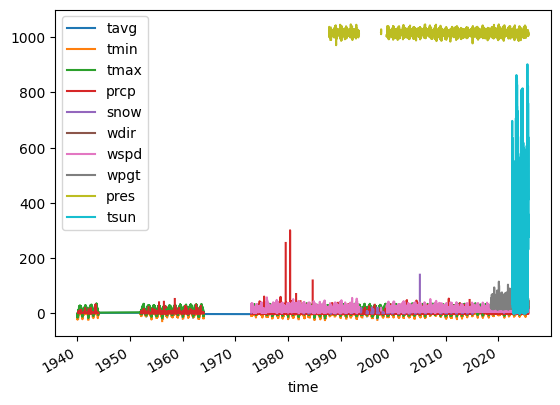

In [38]:
denni_ruzyne.plot();

Tam toho moc vidƒõt nen√≠. Jedn√≠m z probl√©m≈Ø je r≈Øzn√° ≈°k√°la veliƒçin. A tak√© bychom si graf mohli trochu zvƒõt≈°it.

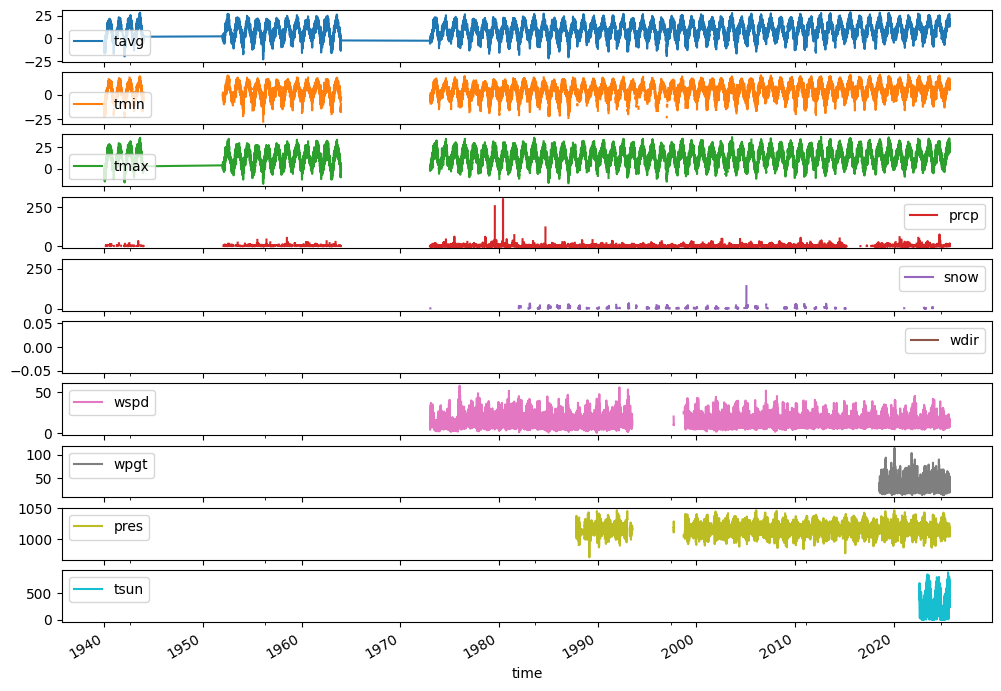

In [39]:
denni_ruzyne.plot(subplots=True, figsize=(12, 9));

Tohle u≈æ je trochu u≈æiteƒçn√©, nƒõco m√°lo na grafu vidƒõt je. V√Ωchoz√≠ ƒç√°rov√Ω (`line`) graf je pro ƒçasov√© ≈ôady ƒçasto vhodn√Ω.

Pomoc√≠ argumentu `layout` m≈Ø≈æeme podgrafy uspo≈ô√°dat do v√≠ce sloupc≈Ø. Pokud nav√≠c vybereme krat≈°√≠ ƒçasov√© obdob√≠, dostaneme u≈æ celkem srozumiteln√Ω v√Ωsledek.

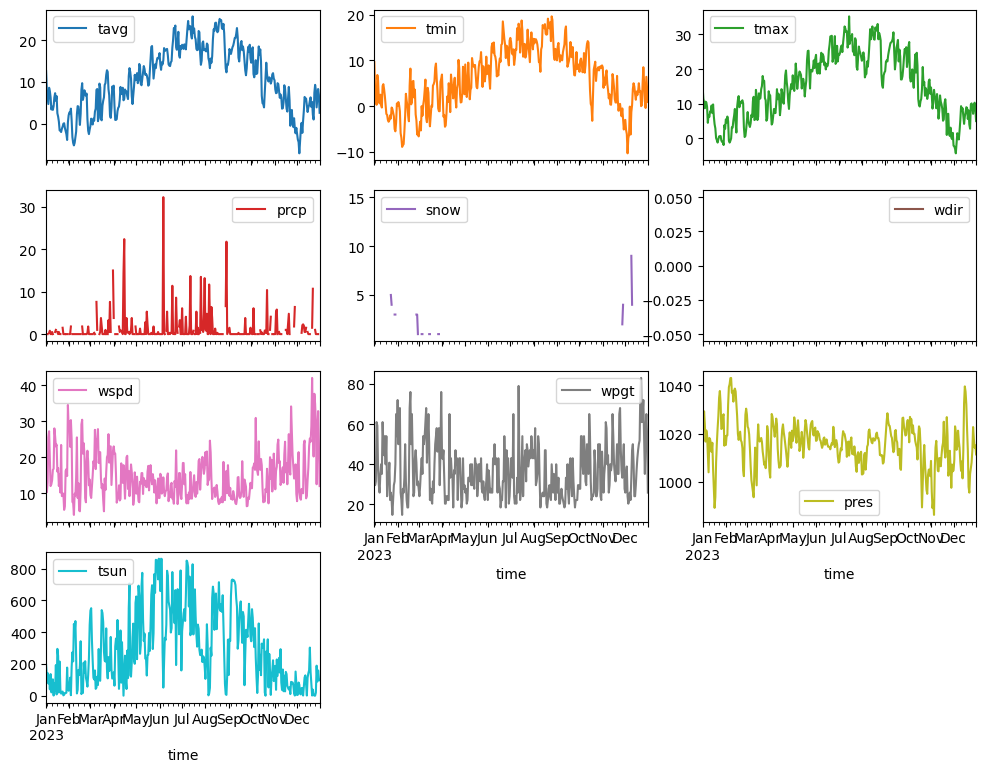

In [43]:
denni_ruzyne.loc["2023"].plot(
    subplots=True, layout=(4, 3), figsize=(12, 9)
);

I tady je ale dat pomƒõrnƒõ hodnƒõ a na grafech vid√≠me spoustu rozptylu - hodnoty sk√°ƒçou rychle nahoru / dol≈Ø. V takov√©m p≈ô√≠padƒõ je na ƒçase vz√≠t si na pomoc statistiku!

## Trocha statistiky - opravdu jen z√°kladn√≠

Nen√≠ c√≠lem tohoto kurzu (a ani v jeho mo≈ænostech) podrobnƒõ a rigor√≥znƒõ uƒçit statistiku ("Statistika nuda je..."). Jednoduch√© z√°klady, kter√© zvl√°daj√≠ i üêºüêºüêº, spolu jistƒõ zvl√°dneme a p≈ôesvƒõdƒç√≠me se, ≈æe jsou i u≈æiteƒçn√© ("...m√° v≈°ak cenn√© √∫daje...").

Pokud se bude≈° cht√≠t dozvƒõdƒõt v√≠c, koukni t≈ôeba na https://www.poritz.net/jonathan/share/ldlos.pdf, nebo na http://greenteapress.com/thinkstats2/thinkstats2.pdf nebo t≈ôeba i na Bayesovskou statistiku http://www.greenteapress.com/thinkbayes/thinkbayes.pdf.

Metoda [`DataFrame.describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) je jednoduchou volbou pro z√≠sk√°n√≠ z√°kladn√≠ch statistik cel√© tabulky.

In [44]:
denni_ruzyne.describe()

tavg          tmin          tmax          prcp         snow  \
count  23258.000000  20595.000000  22769.000000  14643.000000  1051.000000   
mean       8.633915      4.478631     13.237187      1.609131     7.550904   
std        8.105865      7.136165      9.424716      5.329052    14.504778   
min      -23.100000    -27.800000    -17.800000      0.000000     1.000000   
25%        2.400000     -0.200000      5.700000      0.000000     2.000000   
50%        9.100000      5.000000     13.800000      0.000000     4.000000   
75%       15.200000     10.000000     20.900000      1.300000    10.000000   
max       28.600000     21.000000     37.400000    301.000000   296.000000   

       wdir          wspd         wpgt          pres         tsun  
count   0.0  17015.000000  2588.000000  11168.000000  1118.000000  
mean    NaN     14.191631    33.702125   1017.130632   276.325581  
std     NaN      6.967184    13.409534      8.598222   219.449714  
min     NaN      0.200000    13.000000    971.100000     0.000000  
25%     NaN      9.100000    24.100000   1011.900000    90.000000  
50%     NaN     12.700000    29.600000   1017.000000   230.500000  
75%     NaN     17.800000    40.800000   1022.400000   433.750000  
max     NaN     58.000000   115.000000   1046.600000   902.000000

Pro ka≈æd√Ω sloupec vid√≠me nƒõkolik souhrnn√Ωch (statistick√Ωch √∫daj≈Ø).
* `count` ud√°v√° poƒçet hodnot.
* `mean` je st≈ôedn√≠ hodnota, vypoƒç√≠tan√° jako aritmetick√Ω pr≈Ømƒõr. 
* `std` je smƒõrodatn√° odchylka, kter√° ukazuje rozptyl dat - jak moc m≈Ø≈æeme oƒçek√°vat, ≈æe se data v souboru budou li≈°it od st≈ôedn√≠ hodnoty.
* `min` a `max` jsou nejmen≈°√≠ a nejvƒõt≈°√≠ hodnoty ve sloupci.
* Procenta oznaƒçuj√≠ kvantily, `25%` a `75%` je hodnota prvn√≠ho a t≈ôet√≠ho "kvartilu". Pokud bychom sloupec se≈ôadili podle podle velikosti, bude ƒçtvrtina dat men≈°√≠ ne≈æ hodnota prvn√≠ho kvartilu a ƒçtvrtina dat bude vƒõt≈°√≠ ne≈æ hodnota t≈ôet√≠ho kvartilu. Konkr√©tnƒõ ƒçtvrtina v≈°ech dn√≠ v na≈°ich datech mƒõla minim√°ln√≠ teplotu men≈°√≠ ne≈æ -0.7 ¬∞C a ƒçtvrtina dn√≠ zase mƒõla maxim√°ln√≠ teplotu vƒõt≈°√≠ ne≈æ 20.5 ¬∞C. 
* `50%` se oznaƒçuje jako medi√°n - polovina dat je men≈°√≠ ne≈æ medi√°n (a ta druh√° polovina je samoz≈ôejmƒõ zase vƒõt≈°√≠ ne≈æ medi√°n).

Za chvilku si je≈°tƒõ uk√°≈æeme, jak tyto hodnoty souvisi s distribuƒçn√≠ funkc√≠ a v≈°e ti bude hned jasnƒõj≈°√≠ :)

`describe` m≈Ø≈æeme samoz≈ôejmƒõ pou≈æ√≠t i na nƒõjakou podmo≈æinu dat. Takto t≈ôeba vypad√° statistika poƒças√≠ v Ruzyni v lednu.

In [45]:
denni_ruzyne[denni_ruzyne.index.month == 1].describe()

tavg         tmin         tmax         prcp        snow  wdir  \
count  1906.000000  1616.000000  1823.000000  1027.000000  305.000000   0.0   
mean     -1.457922    -4.038552     1.213275     0.858812    8.045902   NaN   
std       5.237619     5.653606     5.087210     1.641651    9.893405   NaN   
min     -22.000000   -24.000000   -17.000000     0.000000    1.000000   NaN   
25%      -4.300000    -7.200000    -1.900000     0.000000    3.000000   NaN   
50%      -0.700000    -3.000000     1.400000     0.000000    5.000000   NaN   
75%       2.000000     0.000000     4.500000     1.300000   12.000000   NaN   
max      12.600000     9.600000    16.000000    16.000000  140.000000   NaN   

              wspd        wpgt         pres        tsun  
count  1466.000000  217.000000   953.000000   93.000000  
mean     16.663779   38.267281  1019.951207   93.913978  
std       9.484197   16.080667    11.225654   97.403091  
min       0.800000   13.000000   977.600000    0.000000  
25%       9.200000   24.100000  1012.400000   19.000000  
50%      14.700000   37.000000  1020.600000   61.000000  
75%      22.675000   50.000000  1028.000000  130.000000  
max      58.000000  115.000000  1046.500000  402.000000

### Statistick√© rozdƒõlen√≠

Pojƒème zkusit pojmy kolem pravdƒõpodobnosti, jako t≈ôeba rozdƒõlovac√≠ funkce nebo hustota pravdƒõpodobnosti, jejich≈æ form√°ln√≠ definice a vlastnosti lze naj√≠t v knih√°ch (nap≈ô. v tƒõch uveden√Ωch v√Ω≈°e) nebo na [wikipedii](https://cs.wikipedia.org/wiki/Distribu%C4%8Dn%C3%AD_funkce), objevovat a zkoumat sp√≠≈° n√°zornƒõ a intuitivnƒõ.

Jedn√≠m ze z√°kladn√≠ch a nesm√≠rnƒõ u≈æiteƒçn√Ωch n√°stroj≈Ø na vizualizaci souboru dat je [histogram](https://cs.wikipedia.org/wiki/Histogram). Zjednodu≈°enƒõ ≈ôeƒçeno, histogram vytvo≈ô√≠ chl√≠veƒçky podle velikosti dat - do ka≈æd√©ho chl√≠veƒçku pat≈ô√≠ data v nƒõjak√©m intervalu od - do. Poƒçet hodnot, kter√© ze souboru dat spadnou do dan√©ho chl√≠veƒçku, urƒçuje velikost (v√Ω≈°ku) chl√≠veƒçku.

Histogram zobraz√≠me pomoc√≠ `.plot.hist()`

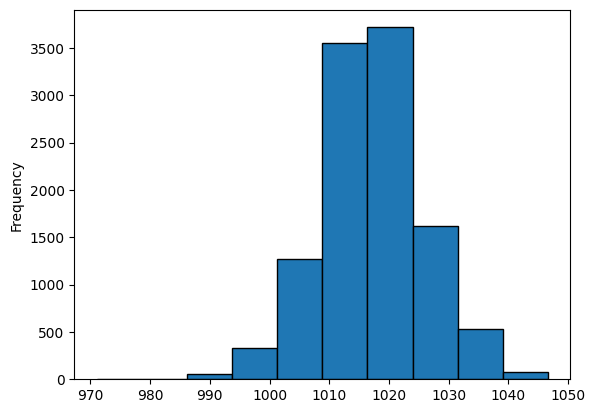

In [46]:
denni_ruzyne["pres"].plot.hist(edgecolor="black");

Histogram n√°m ≈ô√≠k√°, ≈æe nƒõkde v rozmez√≠ 1008 - 1023 je nejv√≠ce hodnot (~7000). Okoln√≠ chl√≠veƒçky maj√≠ u≈æ v√Ωraznƒõ men≈°√≠ velikost, sotva poloviƒçn√≠. Na okraj√≠ch jsou jen n√≠zk√© chl√≠veƒçky, jak√©si ocasy.

P≈ôem√Ω≈°lej - kdybychom si vybrali n√°hodnƒõ jeden den. 
1. Z kter√©ho (jednoho) z chl√≠veƒçk≈Ø v grafu bude nejƒçastƒõji le≈æet tlak? 
2. Jak√Ωch 5 chl√≠veƒçk≈Ø bys vybrala, abys mƒõla opravdu hodnƒõ velkou ≈°anci, ≈æe tlak ve vybran√©m dni bude v jednom z tƒõchto chl√≠veƒçk≈Ø?

Pokud dok√°≈æe≈° na ot√°zky odpovƒõdƒõt, tak u≈æ vlastnƒõ v√≠≈°, ≈æe histogram ud√°v√° *hustotu pravdƒõpodobnosti* a ≈æe tahle hustota se d√° sƒç√≠tat, ƒç√≠m≈æ se dostane *kumulovan√° pravdƒõpodobnost*, neboli tak√© *distribuƒçn√≠ funkce*.

Definice je vlastnƒõ docela jednoduch√° (zdroj [wikipedia](https://cs.wikipedia.org/wiki/Distribu%C4%8Dn%C3%AD_funkce)): 

> Distribuƒçn√≠ funkce, funkce rozdƒõlen√≠ (pravdƒõpodobnosti) nebo (sp√≠≈°e lidovƒõ) (zleva) kumulovan√° pravdƒõpodobnost (anglicky Cumulative Distribution Function, CDF) je funkce, kter√° ud√°v√° pravdƒõpodobnost, ≈æe hodnota n√°hodn√© promƒõnn√© je men≈°√≠ ne≈æ zadan√° hodnota. 

Hustota pravdƒõpodobnosti vyjad≈ôuje, kolik "pravdƒõpodobnosti" p≈ôibude na dan√©m intervalu, neboli o kolik se zmƒõn√≠ distrubuƒçn√≠ funkce. Matematicky je hustota pravdƒõpodobnosti derivac√≠ distribuƒçn√≠ funkce.

Pomƒõrnƒõ d≈Øle≈æit√Ωm parametrem u histogramu je poƒçet chl√≠vk≈Ø. Kdy≈æ jich je m√°lo, m≈Ø≈æe zaniknout d≈Øle≈æit√° informace, moc chl√≠vk≈Ø m≈Ø≈æe zase vn√©st velk√Ω ≈°um. 

Pro na≈°e data vypad√° histogram s t≈ôiceti chl√≠vky celkem rozumnƒõ.

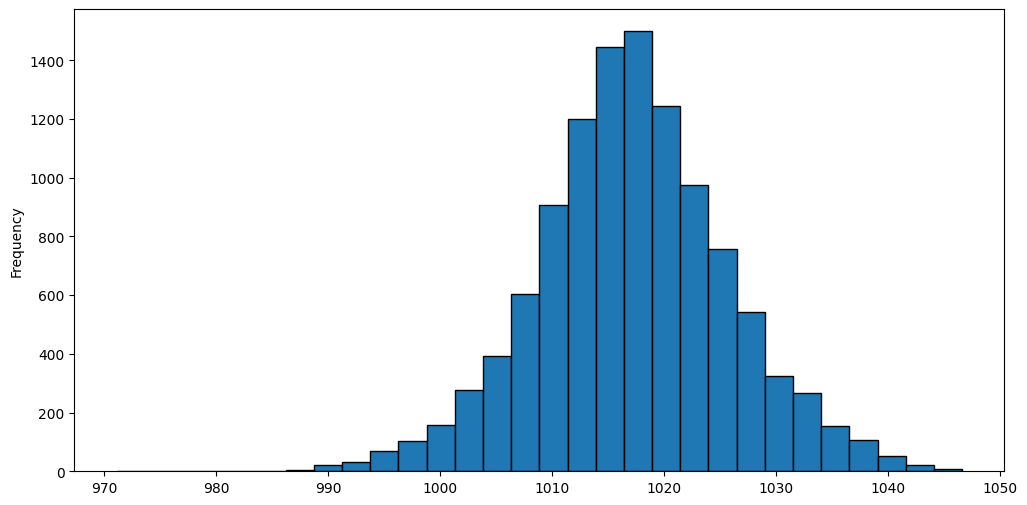

In [48]:
denni_ruzyne["pres"].plot.hist(bins=30, figsize=(12, 6), edgecolor="black");

Na vlastn√≠ nebezpeƒç√≠ m≈Ø≈æete na tvo≈ôen√≠ histogram≈Ø pou≈æ√≠t [physt](https://github.com/janpipek/physt) Honzy Pipka. P≈ôid√°v√°  p√°r zaj√≠mav√Ωch vlastnost√≠ a ƒçasto usnadn√≠ pr√°ci.

In [ ]:
# physt mo≈æn√° nem√°te nainstalovan√Ω - staƒç√≠ odkomentovat
# %pip install physt

Note: you may need to restart the kernel to use updated packages.


c:\Users\janpi\Documents\code\pyladies-kurz\.venv\Scripts\python.exe: No module named pip


In [50]:
import physt

histogram = physt.h1(denni_ruzyne["pres"], "fixed_width", bin_width=5)
histogram.plot(edgecolor="black", show_values=True, show_stats=True);

ModuleNotFoundError: No module named 'physt'

Argument `cumulative=True` n√°m pak zobraz√≠ postupn√Ω (kumulativn√≠) souƒçet velikosti chl√≠vk≈Ø. Pou≈æijeme je≈°tƒõ `density=True`, abychom zobrazili distribuƒçn√≠ funkci. Takto n√°m graf ≈ô√≠k√°, jak√° je pravdƒõpodobnost (hodnota na vertik√°ln√≠ ose), ≈æe tlak bude men≈°√≠ ne≈æ dan√° hodnota (na horizont√°ln√≠ ose). 

V grafu jsou je≈°tƒõ p≈ôidan√© svisl√© ƒç√°ry pro st≈ôedn√≠ hodnotu (ƒçern√°), medi√°n (ƒçerven√°) a 25% a 75% kvantily (ƒçerven√© p≈ôeru≈°ovan√©).

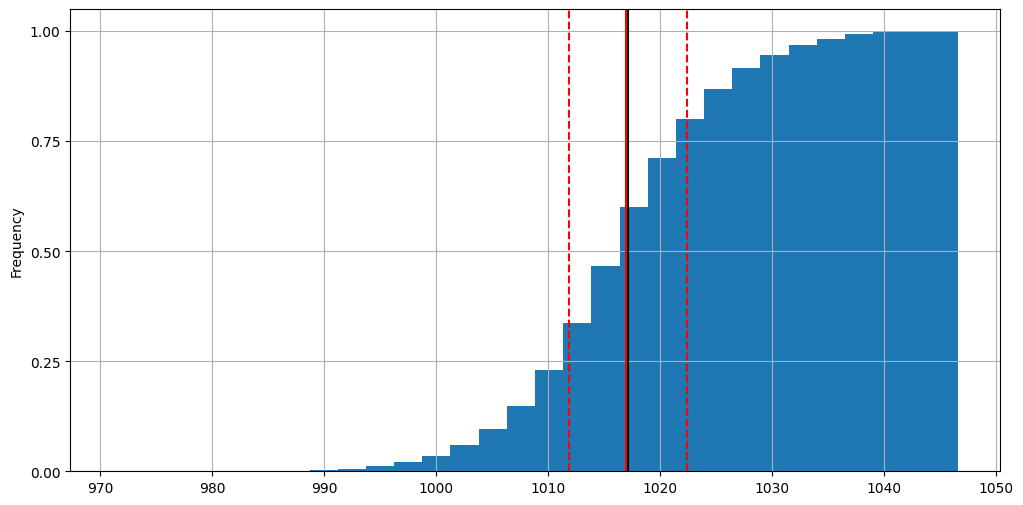

In [51]:
ax = denni_ruzyne["pres"].plot.hist(
    bins=30, figsize=(12, 6), cumulative=True, density=True, grid=True
)
ax.set_yticks(np.arange(0, 1.1, 0.25))
ax.axvline(denni_ruzyne["pres"].mean(), color="k")
ax.axvline(denni_ruzyne["pres"].median(), color="r")
ax.axvline(denni_ruzyne["pres"].quantile(0.25), color="r", ls="--")
ax.axvline(denni_ruzyne["pres"].quantile(0.75), color="r", ls="--")

Pod√≠vejme se, jak vypadaj√≠ histogramy v≈°ech dev√≠ti veliƒçin. 

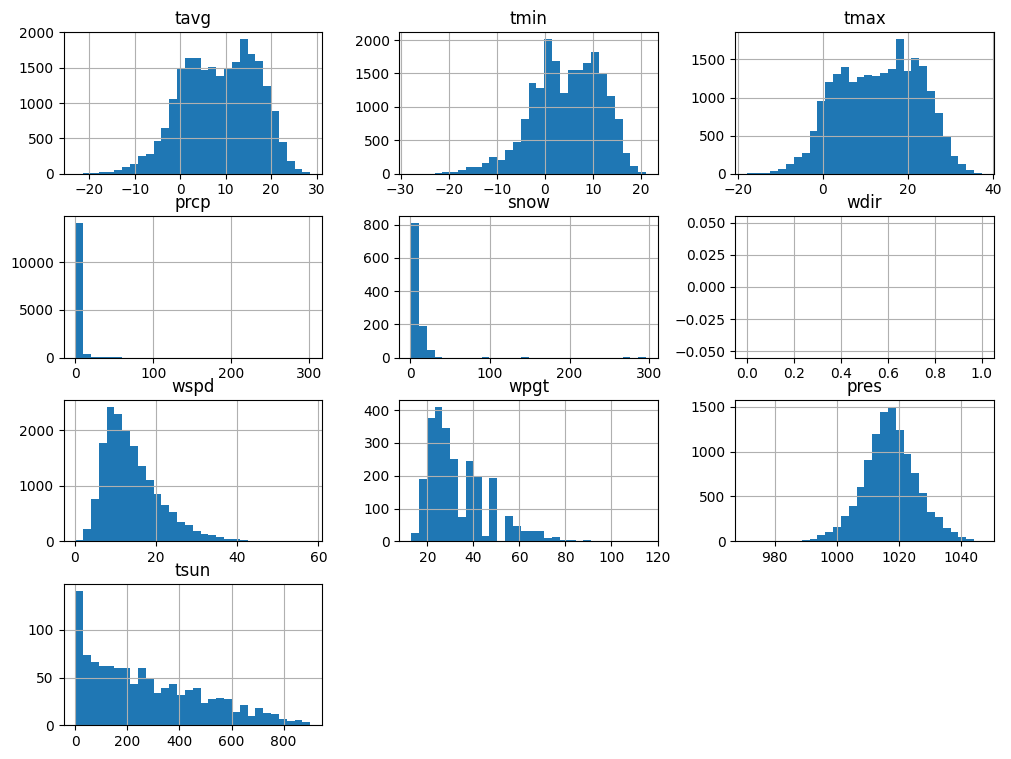

In [52]:
denni_ruzyne.hist(figsize=(12, 9), bins=30);

c:\Users\janpi\Documents\code\pyladies-kurz\.venv\Lib\site-packages\numpy\lib\_histograms_impl.py:897: RuntimeWarning: invalid value encountered in divide
  return n / db / n.sum(), bin_edges


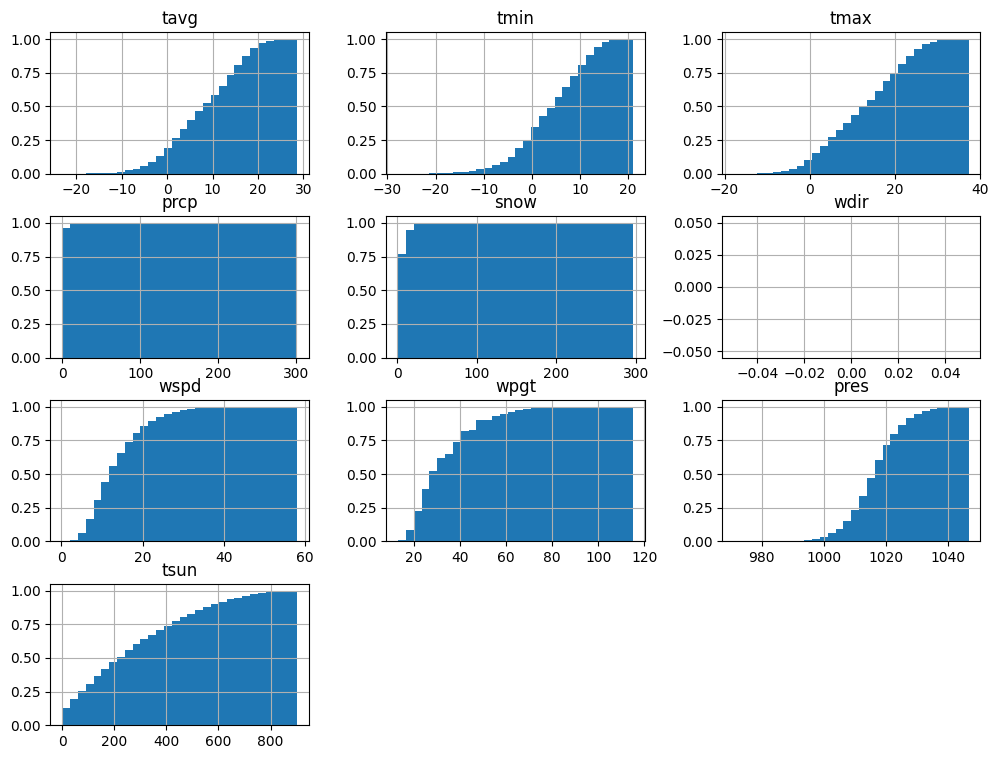

In [54]:
denni_ruzyne.hist(figsize=(12, 9), bins=30, cumulative=True, density=True);

Je pomƒõrnƒõ zaj√≠mav√© a p≈ô√≠hodn√©, ≈æe dost√°v√°me pomƒõrnƒõ hezkou paletu r≈Øzn√Ωch typu rozdƒõlovac√≠ funkce. Tlak vzduchu m√° p≈ôibli≈ænƒõ **[norm√°ln√≠ (Gaussovo) rozdƒõlen√≠](https://cs.wikipedia.org/wiki/Norm%C3%A1ln%C3%AD_rozd%C4%9Blen%C3%AD)**. O tom jste mo≈æn√° sly≈°eli, proto≈æe se vyskutuje a pou≈æ√≠v√° pomƒõrnƒõ ƒçasto (nƒõkdy a≈æ p≈ô√≠li≈° ƒçasto). U teploty je zaj√≠mav√©, ≈æe m√° tzv. **bi-mod√°ln√≠ rozdƒõlen√≠** - na histogramu jsou dvƒõ maxima. U dal≈°√≠ch veliƒçin se m≈Ø≈æeme zamyslet, kter√° z [mnoha zn√°m√Ωch distribuc√≠](https://en.wikipedia.org/wiki/Log-normal_distribution) by se na jejich popis v√≠ce ƒçi m√©nƒõ hodila. Logaritmicko-norm√°ln√≠ na na rychlost vƒõtru? Nƒõjak√° exponenci√°ln√≠ (nebo obecnƒõ gamma) distribuce v√Ω≈°ky snƒõhu, √∫hrnu sr√°≈æek a mo≈æn√° sluneƒçn√≠ho svitu? Toto ponechejme na nƒõjak√Ω podrobnƒõj≈°√≠ kurz statistiky, meteorologie ƒçi klimatologie :)

R≈Øznorod√© distribuƒçn√≠ funkce n√°m ale umo≈æn√≠ uk√°zat nƒõkter√© vlastnosti st≈ôedn√≠ hodnoty a medi√°nu. To jsou (spoleƒçnƒõ s m√≥dy, tedy maximy hustoty pravdƒõpodobnosti) ukazatele centr√°ln√≠ tendence souboru dat. Medi√°n a st≈ôedn√≠ hodnota se pomƒõrnƒõ ƒçasto neli≈°√≠ a u "hezk√Ωch" (symetrick√Ωch) distribuc√≠, jako je norm√°ln√≠ rozdƒõlen√≠, jsou toto≈æn√©. Li≈°it se budou zejm√©na tehdy, kdy≈æ je distribuce se≈°ikmen√° (angl. skewed) nebo pokud jsou v datech odlehl√© hodnoty, sp√≠≈°e zn√°m√© pod anglick√Ωm v√Ωrazem [outliers](https://en.wikipedia.org/wiki/Outlier).

Zabal√≠me do funkce vykreslovan√≠ histogramu spolu se st≈ôedn√≠ hodnotou a kvantily, kter√© jsme pou≈æili ji≈æ d≈ô√≠ve. Pot√© pou≈æijeme velice u≈æiteƒçnou knihovnu [seaborn](https://seaborn.pydata.org) na vykreslen√≠ histogram≈Ø pro jednotliv√© veliƒçiny.

In [55]:
def hist_plot_with_extras(data, bins=30, cumulative=False, density=False, **kwargs):
    """Plot histogram with mean and quantiles"""
    ax = kwargs.pop("ax", plt.gca())
    ax.hist(data, bins=bins, cumulative=cumulative, density=density, **kwargs)
    ax.grid(True)
    if density:
        ax.set_yticks(np.arange(0, 1.1, 0.25))
    ax.axvline(data.mean(), color="k")
    ax.axvline(data.median(), color="r")
    ax.axvline(data.quantile(0.25), color="r", ls="--")
    ax.axvline(data.quantile(0.75), color="r", ls="--")
    return ax

V≈°imnƒõte si pou≈æit√≠ `.melt()` - seaborn toti≈æ oƒçek√°v√° data v jednom sloupci, jednotliv√© grafy pak tvo≈ô√≠ na z√°kladƒõ hodnoty jin√©ho sloupce. Vytvo≈ôili jsme vlastnƒõ kategorickou promƒõnnou "value".

Teƒè m≈Ø≈æeme pou≈æ√≠t [`FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), kter√Ω vytv√°≈ô√≠ sadu graf≈Ø, rozdƒõlen√Ωch do m≈ô√≠≈æky podle nƒõjak√© vlastnosti dat (kategorie).

c:\Users\janpi\Documents\code\pyladies-kurz\.venv\Lib\site-packages\matplotlib\axes\_axes.py:7104: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\Users\janpi\Documents\code\pyladies-kurz\.venv\Lib\site-packages\matplotlib\axes\_axes.py:7105: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

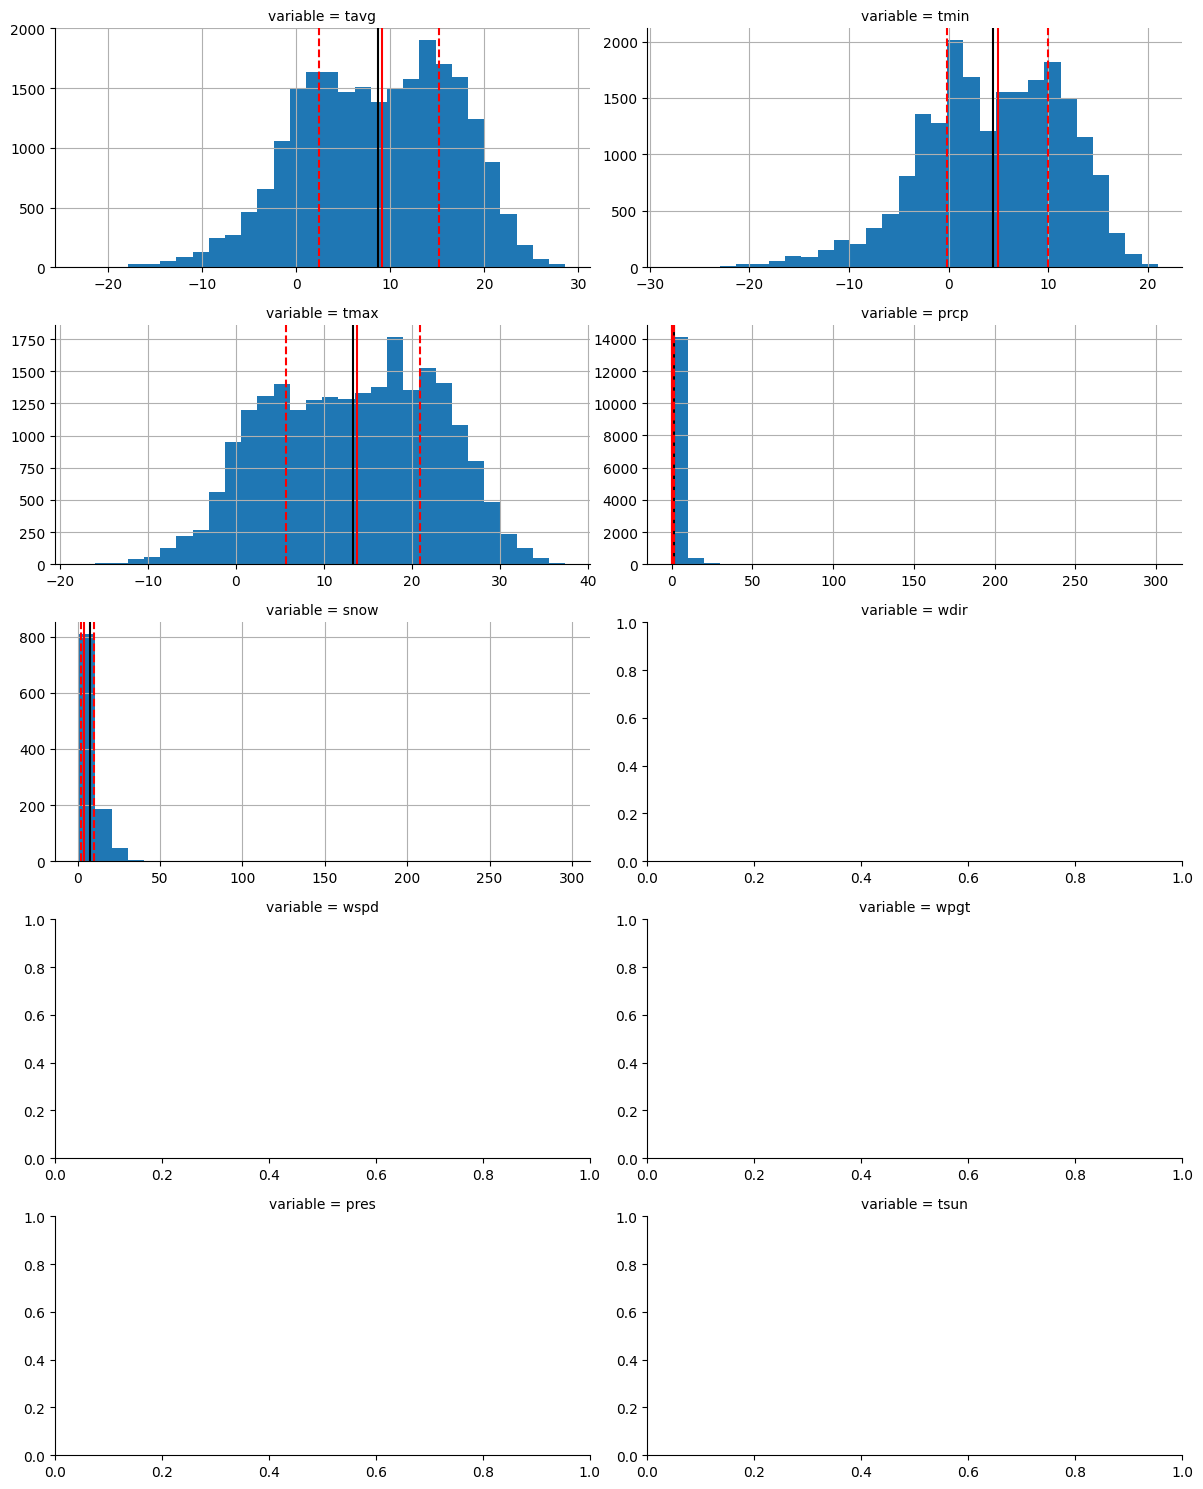

In [56]:
grid = sns.FacetGrid(
    denni_ruzyne.melt(),
    col="variable",
    col_wrap=2,
    sharey=False,
    sharex=False,
    aspect=2,
)
grid.map(hist_plot_with_extras, "value");

Kromƒõ histogramu se velice ƒçasto pou≈æ√≠v√° pro zobrazen√≠ distribuce tzv. [boxplot](https://cs.wikipedia.org/wiki/Boxplot). "Krabiƒçka" (obd√©ln√≠k) uprost≈ôed vymezuje oblast mezi prvn√≠m a t≈ôet√≠m kvartilem (Q1 a Q3), dƒõlic√≠ ƒç√°ra odpov√≠d√° medi√°nu, a "vousy" (anglicky whiskers) znaƒç√≠ rozsah dat. Standardnƒõ je to posledn√≠ bod, kter√Ω je men≈°√≠ / vƒõt≈°√≠ ne≈æ 1,5n√°sobek "inter-quartile range" IQR, `IQR = Q3 - Q1`. Tento rozsah se obvykle pova≈æuje za mez pro odlehl√© hodnoty, kter√© jsou pak v boxplotu vyznaƒçeny jako symboly (kosoƒçtverce v na≈°em p≈ô√≠padƒõ).

c:\Users\janpi\Documents\code\pyladies-kurz\.venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


ValueError: List of boxplot statistics and `positions` values must have same the length

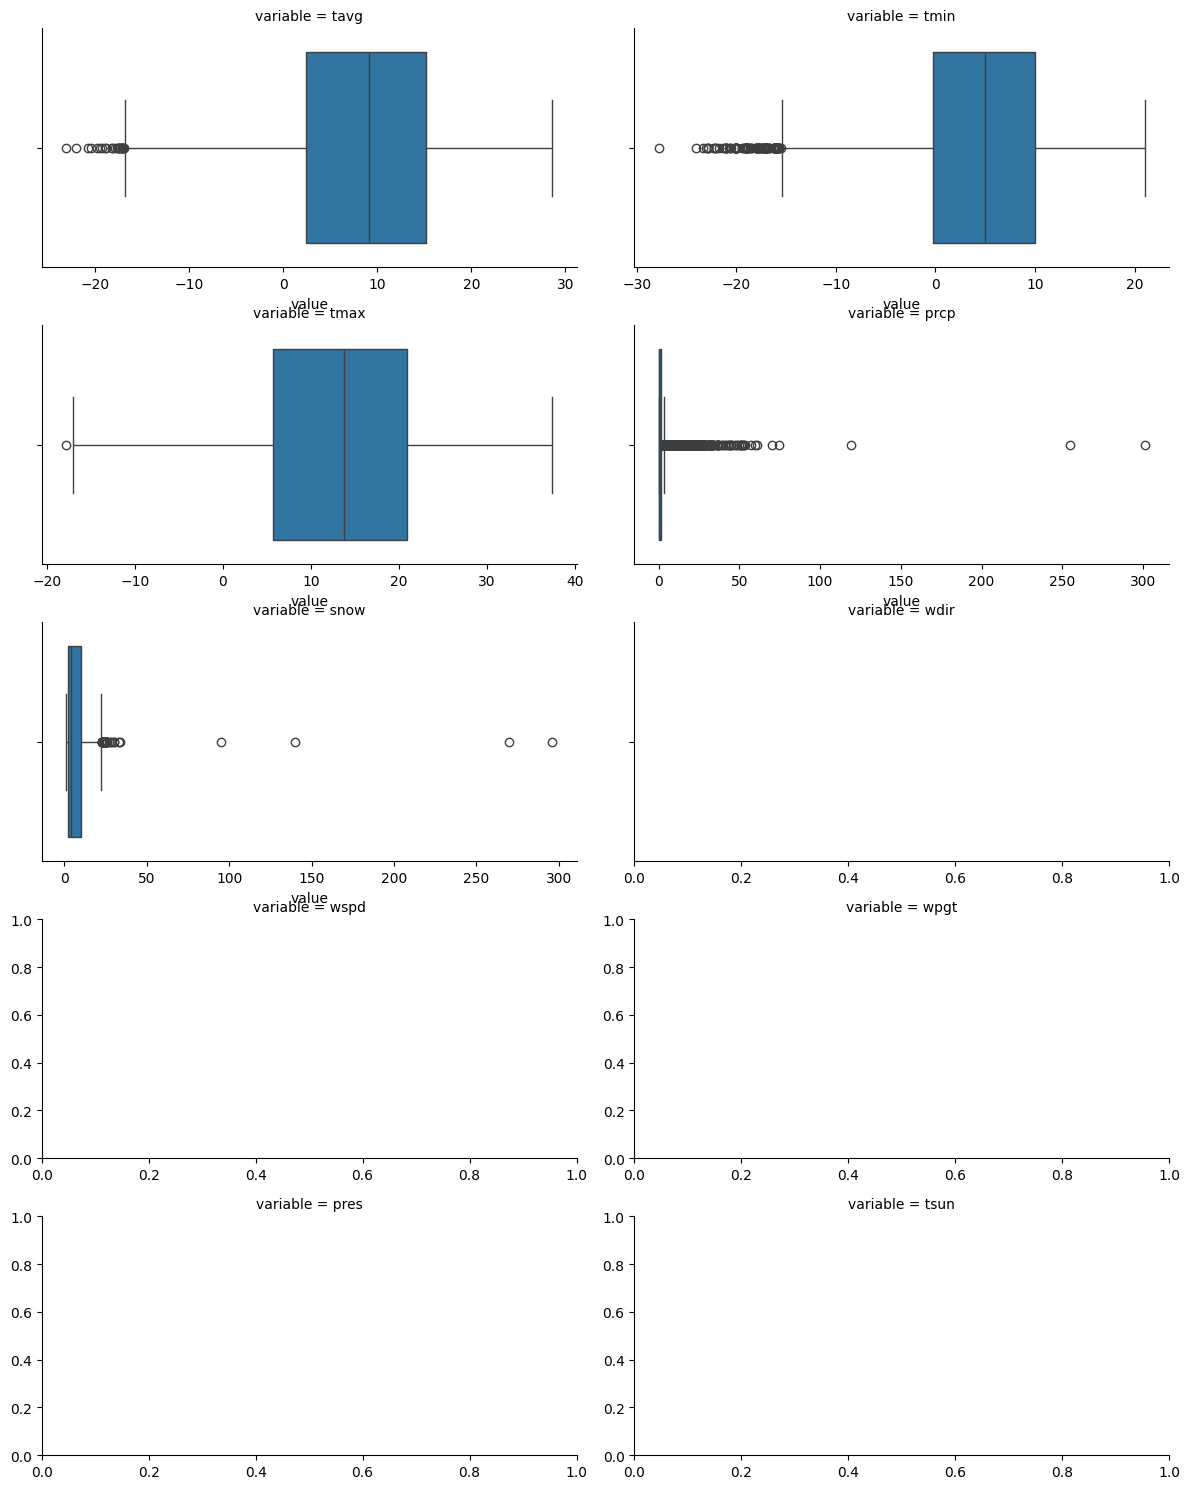

In [57]:
grid = sns.FacetGrid(
    denni_ruzyne.melt(),
    col="variable",
    col_wrap=2,
    sharey=False,
    sharex=False,
    aspect=2,
)
grid.map(sns.boxplot, "value");

Seaborn se ƒçasto d√° pou≈æ√≠t velice jednodu≈°e, pokud zobrazujeme jednu veliƒçinu, a nƒõkdy str√°v√≠ i "wide-format" data. U na≈°ich dat m≈Ø≈æeme takto porovnat pr≈Ømƒõrnou, minim√°ln√≠ a maxim√°ln√≠ teplotu. Na pomoc si vezmeme [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html), kter√Ω vytv√°≈ô√≠ graf (nebo i sadu graf≈Ø) r≈Øzn√Ωch typ≈Ø (boxplot nebo t≈ôeba violinplot) z dat obsahuj√≠c√≠ch jednu ƒçi v√≠ce kategorick√Ωch promƒõnn√Ωch.

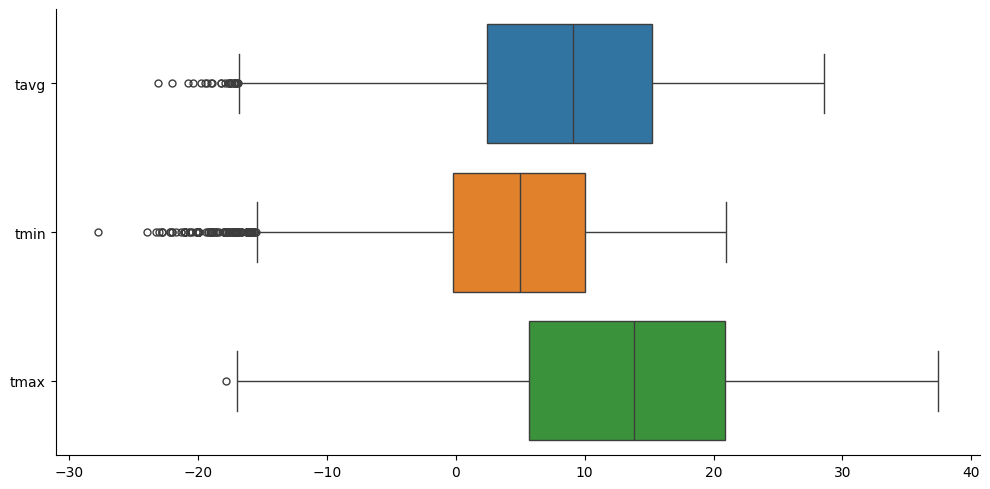

In [58]:
sns.catplot(
    data=denni_ruzyne[["tavg", "tmin", "tmax"]],
    orient="h",
    kind="box",
    aspect=2,
);

**√ökol**: Dopl≈àte pomocn√© sloupce `season` a `significant_precipitation` (jistƒõ uh√°dnete jak√©ho pandas-typu budou :). Prvn√≠ definuje roƒçn√≠ obdob√≠ (jen jednodu≈°e podle kalend√°≈ôn√≠ch mƒõs√≠c≈Ø), druh√Ω oznaƒçuje dny, kdy byly sr√°≈æky vy≈°≈°√≠ ne≈æ v **90 %** v≈°ech dn√≠ v na≈°ich datech (m≈Ø≈æete zkusit i jin√Ω limit).

1. Porovnejte numericky z√°kladn√≠ statistiky cel√©ho datasetu a podmno≈æiny, kdy v√Ωraznƒõ pr≈°elo nebo snƒõ≈æilo. Zvy≈°uj√≠ v pr≈Ømƒõru sr√°≈æky teplotu? A co maxim√°ln√≠ nebo minim√°ln√≠? A jak je to se standardn√≠ odchylkou?
2. Pou≈æijte `sns.catplot` pro vizu√°ln√≠ srovn√°n√≠ distribuƒçn√≠ch funkc√≠ pro jednotliv√° roƒçn√≠ obdob√≠ a dny s m√°lo / hodnƒõ sr√°≈ækami.

In [ ]:
# odkomentuj a dopl≈à
# season = denni_ruzyne.index.___.map({
#     1: "zima",
#     2: "zima",
#     3: "jaro",
#     ...
#  })

# significant_precipitation = denni_ruzyne["prcp"] > denni_ruzyne[___].quantile(___)

In [ ]:
# √∫kol - jednoduch√© srovn√°n√≠ statistik pomoc√≠ rozd√≠lu

# (denni_ruzyne.loc[___]
#  .describe()
# ) - \
# denni_ruzyne.___()

In [ ]:
# √∫kol - vizu√°ln√≠ srovn√°n√≠ statistik

# sns.catplot(
#     data=denni_ruzyne.assign(
#         significant_precipitation=___,
#         season=___,
#     ),
#     kind="box",
#     aspect=2,
#     hue=___,
#     y=___,
#     x=___,
# );

## Pr√°ce s ƒçasovou ≈ôadou

Pojƒème trochu zkombinovat statistiku a pr√°ci s ƒçasovou ≈ôadou. Zaj√≠malo by v√°s, jak moc byl kter√Ω rok tepl√Ω ƒçi studen√Ω? Pomoc√≠ [`resample`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html#pandas.DataFrame.resample) m≈Ø≈æeme zmƒõnit rozli≈°en√≠ dat na jin√© obdob√≠, nap≈ô. jeden rok.

In [ ]:
rocni_ruzyne = denni_ruzyne.resample("1YE")

AttributeError: 'DatetimeIndexResampler' object has no attribute 'resample'

Co ≈æe jsme to vlastnƒõ vytvo≈ôili?

In [ ]:
rocni_ruzyne

Dostali jsme instanci t≈ô√≠dy `DatetimeIndexResampler`. To zn√≠ logicky, ale kde jsou data? Ta zat√≠m nejsou, proto≈æe jsme je≈°tƒõ pand√°m ne≈ôekli, jak vlastnƒõ maj√≠ ze v≈°ech tƒõch denn√≠ch √∫daj≈Ø v r√°mci jednoho roku vytvo≈ôit ta roƒçn√≠ data. Neboli, jak data *agregovat*.

Ze statistiky v√≠me, ≈æe jedn√≠m z ukazatel≈Ø m≈Ø≈æe b√Ωt st≈ôedn√≠ hodnota. Zkus√≠me vypoƒç√≠tat pr≈Ømƒõrnou "teplotu pr≈Ømƒõrnou" (nen√≠ to p≈ôeklep) a rovnou vykreslit.

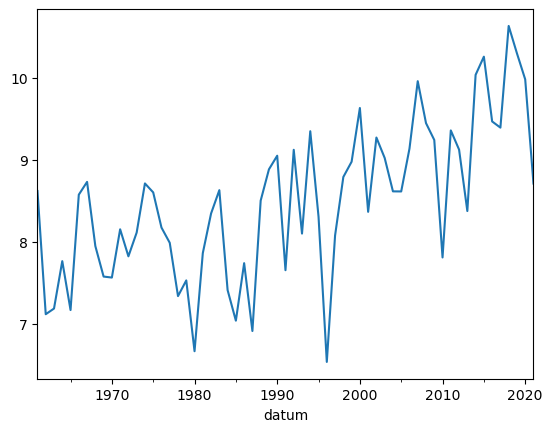

In [ ]:
rocni_ruzyne["tavg"].mean().plot();

Trochu podobnou operac√≠ jako resampling je rolov√°n√≠. To spoƒç√≠v√° v plynul√©m posouv√°n√≠ "okna", kter√© slou≈æ√≠ pro (v√°≈æen√Ω) v√Ωbƒõr dat a n√°sledn√© aplikaci agregaƒçn√≠ funkce (jako u `resample`). Pojƒème pomoc√≠ [`rolling`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html#pandas.DataFrame.rolling) vytvo≈ôit podobn√Ω pohled na roƒçn√≠ pr≈Ømƒõrnou teplotu. Rozd√≠l oproti `resample` je v tom, ≈æe dostaneme pro ka≈æd√Ω den jednu hodnotu, nikoli jen jednu hodnotu pro cel√Ω rok. A tak√© u≈æ nem≈Ø≈æeme pou≈æ√≠t interval `"1Y"`, proto≈æe jeden (kalend√°≈ôn√≠) rok nen√≠ dob≈ôe definovan√Ω interval d√≠ky p≈ôestupn√Ωm rok≈Øm.

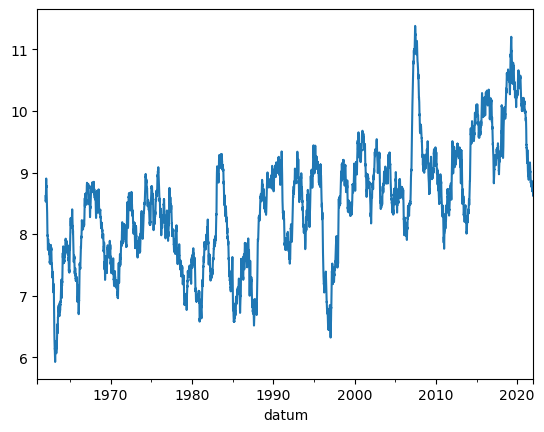

In [ ]:
rocni_ruzyne["tavg"].rolling("365.25D", min_periods=365).mean().plot();

Pro podrobnƒõj≈°√≠ p≈ôehled pr√°ce s ƒçasov√Ωmi ≈ôadami se pod√≠vejta nap≈ô. na https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html nebo t≈ôeba na hezk√Ω ƒçl√°nek s podobn√Ωmi daty https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/.

**√ökol:** Navrhnƒõte vhodnou agregaci pro maxim√°ln√≠ teplotu (ne pr≈Ømƒõr) a vykreslete.

In [ ]:
# odkomentuj a dopl≈à
# rocni_ruzyne[___].___().___();

**√ökol:** P≈ôevzorkujte √∫daje za rok 2018 po mƒõs√≠c√≠ch. Jak√Ω mƒõs√≠c mƒõl nejv√≠c sr√°≈æek, tj. za jak√Ω byl souƒçet sloupce "√∫hrn sr√°≈æek" nejvy≈°≈°√≠?

In [ ]:
# dopl≈àte nebo vy≈ôe≈°te po sv√©m :)
# rocni_ruzyne.loc[___ == 2018, "prcp"].___(
#     "1M"
# ).___().___(ascending=False).index[___].___